In [1]:
# import libraries

import requests
import pandas as pd
import numpy as np
import time

In [2]:
# use FPL API to access FPL data

url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
r = requests.get(url)
json = r.json()
json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [3]:
# create dataframes for teams, elements, and element_type data

teams_df = pd.DataFrame(json['teams'])

elements_df = pd.DataFrame(json['elements'])

elements_types_df = pd.DataFrame(json['element_types'])


In [4]:
# inspect each dataframe

In [5]:
teams_df.head()

,code,draw,form,id,loss,name,played,points,position,short_name,...,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,None,1,0,Arsenal,0,0,0,ARS,...,None,False,0,1200,1250,1130,1150,1220,1210,1
1,7,0,None,2,0,Aston Villa,0,0,0,AVL,...,None,False,0,1100,1160,1120,1140,1080,1100,2
2,94,0,None,3,0,Brentford,0,0,0,BRE,...,None,False,0,1010,1020,1020,1030,1020,1030,130
3,36,0,None,4,0,Brighton,0,0,0,BHA,...,None,False,0,1100,1130,1150,1190,1100,1130,131
4,90,0,None,5,0,Burnley,0,0,0,BUR,...,None,False,0,1060,1070,1040,1090,1040,1080,43


In [6]:
elements_df.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,...,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text
0,NaN,None,80201,0,0,0,0,0,1,3.6,...,334,4,198,13,NaN,,NaN,,NaN,
1,NaN,None,115918,0,0,0,0,0,1,2.0,...,349,15,362,32,NaN,,NaN,,NaN,
2,NaN,None,47431,0,0,0,0,0,3,3.2,...,146,85,124,71,1.0,,2.0,,NaN,
3,25.0,None,54694,0,0,0,0,0,4,1.0,...,32,16,50,18,NaN,,NaN,,1.0,
4,NaN,None,58822,0,0,0,0,0,2,2.7,...,265,87,295,101,NaN,,5.0,,NaN,


In [7]:
elements_types_df

,id,plural_name,plural_name_short,singular_name,singular_name_short,squad_select,squad_min_play,squad_max_play,ui_shirt_specific,sub_positions_locked,element_count
0,1,Goalkeepers,GKP,Goalkeeper,GKP,2,1,1,True,[12],56
1,2,Defenders,DEF,Defender,DEF,5,3,5,False,[],181
2,3,Midfielders,MID,Midfielder,MID,5,2,5,False,[],223
3,4,Forwards,FWD,Forward,FWD,3,1,3,False,[],70


In [8]:
# further inspect columns of elements dataframe

elements_df.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'influence_rank', 'influence_rank_type', 'creativity_rank',
       'creativity_rank_type', 'threat_rank'

In [9]:
# filter out irrelevent columns from elements_df

slim_elements_df = elements_df[['id','first_name','second_name','team','element_type','selected_by_percent','now_cost','minutes','transfers_in','value_season','total_points', 'status']]

# change index

slim_elements_df = slim_elements_df.set_index('id')

# map position from element_types_df into slim_elements_df

slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)

# map team name from teams_df into slim_elements_df

slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)

# ensure all value info is of type int

slim_elements_df['value_season'] = slim_elements_df.value_season.astype(float)

# add points per 90

slim_elements_df['ppg'] = (slim_elements_df['total_points'] / slim_elements_df['minutes']) * 90

# remove players with less than 18 games played minutes

slim_elements_df = slim_elements_df.loc[slim_elements_df.minutes > 1620]

# add new value metric: points per minute per cost

slim_elements_df['value'] = slim_elements_df['ppg'] / slim_elements_df['now_cost']

In [10]:
# view best value players

slim_elements_df.sort_values(by = 'value', ascending = False).head(10)

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,status,position,ppg,value
id,,,,,,,,,,,,,,
252,John,Stones,Man City,2,11.9,55,1933,0,23.3,128,a,Defender,5.959648,0.108357
250,Ilkay,Gündogan,Man City,3,8.7,75,2025,0,20.9,157,a,Midfielder,6.977778,0.093037
135,Benjamin,Chilwell,Chelsea,2,13.7,60,2286,0,23.2,139,a,Defender,5.472441,0.091207
256,João Pedro Cavaco,Cancelo,Man City,2,7.4,60,2298,0,23.0,138,a,Defender,5.404700,0.090078
127,Antonio,Rüdiger,Chelsea,2,6.8,55,1710,0,16.9,93,a,Defender,4.894737,0.088995
30,Emiliano,Martínez,Aston Villa,1,36.5,55,3420,0,33.8,186,a,Goalkeeper,4.894737,0.088995
199,Illan,Meslier,Leeds,1,4.3,50,3150,0,30.8,154,a,Goalkeeper,4.400000,0.088000
218,James,Justin,Leicester,2,0.0,50,2070,0,20.2,101,i,Defender,4.391304,0.087826
32,Bertrand,Traoré,Aston Villa,3,2.2,60,2315,0,22.5,135,a,Midfielder,5.248380,0.087473


In [11]:
# calculate mean value per position

pivot=slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()
pivot.sort_values('value',ascending=False)

,position,value
2,Goalkeeper,0.075270
0,Defender,0.069460
3,Midfielder,0.062029
1,Forward,0.061740


In [12]:
# calculate mean value per team

team_pivot = slim_elements_df.pivot_table(index='team',values='value',aggfunc=np.mean).reset_index()
team_pivot.sort_values('value',ascending=False)

,team,value
10,Man City,0.071995
15,West Ham,0.071001
7,Leeds,0.070292
2,Brighton,0.069041
1,Aston Villa,0.068769
4,Chelsea,0.068575
0,Arsenal,0.067976
8,Leicester,0.067410
6,Everton,0.066360
11,Man Utd,0.066237


In [13]:
# create new dataframes for each position

fwd_df = slim_elements_df.loc[slim_elements_df.position == 'Forward']
mid_df = slim_elements_df.loc[slim_elements_df.position == 'Midfielder']
def_df = slim_elements_df.loc[slim_elements_df.position == 'Defender']
goal_df = slim_elements_df.loc[slim_elements_df.position == 'Goalkeeper']

<AxesSubplot:>

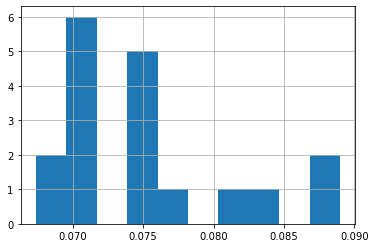

In [14]:
# histogram of goalkeeper values

goal_df.value.hist()

In [15]:
# most valuable goalkeepers

goal_df.sort_values('value',ascending=False).head(10)

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,status,position,ppg,value
id,,,,,,,,,,,,,,
30,Emiliano,Martínez,Aston Villa,1,36.5,55,3420,0,33.8,186,a,Goalkeeper,4.894737,0.088995
199,Illan,Meslier,Leeds,1,4.3,50,3150,0,30.8,154,a,Goalkeeper,4.400000,0.088000
69,Robert,Sánchez,Brighton,1,25.9,45,2430,0,22.4,101,a,Goalkeeper,3.740741,0.083128
112,Nick,Pope,Burnley,1,4.3,55,2880,0,26.2,144,a,Goalkeeper,4.500000,0.081818
143,Edouard,Mendy,Chelsea,1,9.3,60,2745,0,23.3,140,a,Goalkeeper,4.590164,0.076503
408,Lukasz,Fabianski,West Ham,1,2.2,50,3150,0,26.6,133,a,Goalkeeper,3.800000,0.076000
1,Bernd,Leno,Arsenal,1,2.3,50,3131,0,26.2,131,a,Goalkeeper,3.765570,0.075311
170,Jordan,Pickford,Everton,1,6.8,50,2742,0,22.8,114,a,Goalkeeper,3.741794,0.074836
146,Vicente,Guaita,Crystal Palace,1,5.5,45,3330,0,27.6,124,a,Goalkeeper,3.351351,0.074474


<AxesSubplot:>

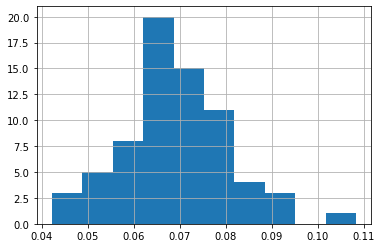

In [16]:
# histogram of defenders

def_df.value.hist()

In [17]:
# most valuable defenders

def_df.sort_values('value',ascending=False).head(10)

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,status,position,ppg,value
id,,,,,,,,,,,,,,
252,John,Stones,Man City,2,11.9,55,1933,0,23.3,128,a,Defender,5.959648,0.108357
135,Benjamin,Chilwell,Chelsea,2,13.7,60,2286,0,23.2,139,a,Defender,5.472441,0.091207
256,João Pedro Cavaco,Cancelo,Man City,2,7.4,60,2298,0,23.0,138,a,Defender,5.404700,0.090078
127,Antonio,Rüdiger,Chelsea,2,6.8,55,1710,0,16.9,93,a,Defender,4.894737,0.088995
218,James,Justin,Leicester,2,0.0,50,2070,0,20.2,101,i,Defender,4.391304,0.087826
128,Kurt,Zouma,Chelsea,2,1.5,55,2027,0,19.6,108,a,Defender,4.795264,0.087187
62,Joël,Veltman,Brighton,2,4.1,45,2280,0,21.3,96,a,Defender,3.789474,0.084211
14,Rob,Holding,Arsenal,2,2.4,45,2557,0,23.3,105,a,Defender,3.695737,0.082127
9,Héctor,Bellerín,Arsenal,2,1.1,50,2089,0,18.8,94,a,Defender,4.049785,0.080996


<AxesSubplot:>

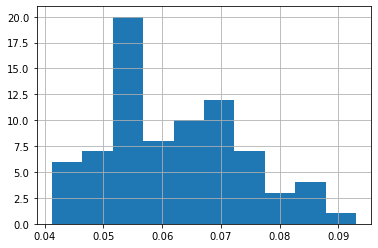

In [18]:
# histogram of midfielders

mid_df.value.hist()

In [19]:
# most valuable midfielders

mid_df.sort_values('value',ascending=False).head(10)

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,status,position,ppg,value
id,,,,,,,,,,,,,,
250,Ilkay,Gündogan,Man City,3,8.7,75,2025,0,20.9,157,a,Midfielder,6.977778,0.093037
32,Bertrand,Traoré,Aston Villa,3,2.2,60,2315,0,22.5,135,a,Midfielder,5.248380,0.087473
123,Jorge Luiz,Frello Filho,Chelsea,3,5.0,60,2006,0,19.0,114,a,Midfielder,5.114656,0.085244
267,Jack,Harrison,Leeds,3,5.1,60,2846,0,26.7,160,a,Midfielder,5.059733,0.084329
215,Harvey,Barnes,Leicester,3,13.8,70,1944,0,18.0,126,a,Midfielder,5.833333,0.083333
188,Stuart,Dallas,Leeds,3,16.1,55,3410,0,31.1,171,a,Midfielder,4.513196,0.082058
212,James,Maddison,Leicester,3,12.7,70,2093,0,19.0,133,a,Midfielder,5.719064,0.081701
196,Raphael,Dias Belloli,Leeds,3,19.2,65,2358,0,20.5,133,a,Midfielder,5.076336,0.078097
420,Jarrod,Bowen,West Ham,3,1.8,65,2556,0,21.7,141,a,Midfielder,4.964789,0.076381


<AxesSubplot:>

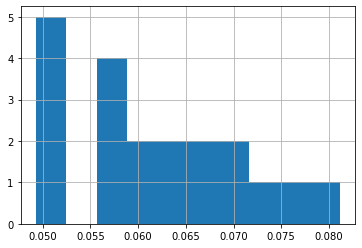

In [20]:
# histogram of forwards

fwd_df.value.hist()

In [21]:
# most valuable forwards

fwd_df.sort_values('value',ascending=False).head(10)

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,status,position,ppg,value
id,,,,,,,,,,,,,,
149,Christian,Benteke,Crystal Palace,4,1.5,65,1808,0,16.3,106,a,Forward,5.276549,0.081178
296,Callum,Wilson,Newcastle,4,7.4,75,2081,0,17.9,134,a,Forward,5.795291,0.077271
413,Michail,Antonio,West Ham,4,24.4,75,1972,0,15.7,118,a,Forward,5.385396,0.071805
189,Patrick,Bamford,Leeds,4,19.1,80,3052,0,24.2,194,a,Forward,5.720839,0.071510
6,Alexandre,Lacazette,Arsenal,4,3.2,85,1916,0,15.2,129,d,Forward,6.059499,0.071288
337,Danny,Ings,Aston Villa,4,38.7,80,2172,0,16.4,131,a,Forward,5.428177,0.067852
345,Che,Adams,Southampton,4,1.9,70,2662,0,19.6,137,a,Forward,4.631856,0.066169
109,Chris,Wood,Burnley,4,3.4,70,2741,0,19.7,138,a,Forward,4.531193,0.064731
177,Dominic,Calvert-Lewin,Everton,4,9.7,80,2871,0,20.6,165,a,Forward,5.172414,0.064655


In [22]:
def get_money_team(data = slim_elements_df, budget = 1000, num_goal = 2, num_def = 5, num_mid = 5, num_fwd = 3):
    money_team = []
    budget = budget
    positions = {'Goalkeeper':num_goal, 'Defender':num_def, 'Midfielder':num_mid, 'Forward':num_fwd}
    teams = {'Arsenal':3, 'Aston Villa':3, 'Brighton':3, 'Burnley':3, 'Chelsea':3, 
             'Crystal Palace':3, 'Everton':3, 'Leicester':3, 'Leeds':3, 'Liverpool':3, 
             'Man City':3, 'Man Utd':3, 'Newcastle':3, 'Norwich':3, 'Southampton':3, 
             'Spurs':3, 'Watford':3, 'West Ham':3, 'Wolves':3, 'Brentford':3, }
    for idx, player in slim_elements_df.sort_values(by = 'value', ascending = False).iterrows():
        if len(money_team) <= 15 and budget >= player.now_cost and positions[player.position] > 0 and teams[player.team] > 0 and player.status == 'a':    
            money_team.append(player)
            budget -= player.now_cost
            positions[player.position] -= 1
            teams[player.team] -= 1
        else:
            continue      
    
    money_team_df = pd.DataFrame(money_team)
    
    time_start = time.time()
    timeout = 5
    while budget > 0:
        for idx1, player in money_team_df.sort_values(by = 'ppg').iterrows():
            position = player.position
            new_budget = budget + player.now_cost
            for idx2, new_player in slim_elements_df.sort_values(by = 'value', ascending = False).iterrows():
                if new_player.name not in money_team_df.index and new_budget >= new_player.now_cost and new_player.position == player.position and new_player.status == 'a' and (teams[new_player.team] > 0 or new_player.team == player.team) and new_player['ppg'] > player['ppg']:   
                    teams[player.team] += 1
                    money_team_df.drop(pd.DataFrame(money_team_df.loc[player.name]), inplace = True)
                    money_team_df = money_team_df.append(pd.DataFrame(slim_elements_df.loc[new_player.name]).T)
                    budget += player.now_cost
                    budget -= new_player.now_cost
                    teams[new_player.team] -= 1

                    break
                else:
                    continue
        if time.time() > time_start + timeout:
            break
    return money_team_df

In [23]:
def calc_budget(num_def = 5, num_mid = 5, num_fwd = 3):
    
    goal_cost = 40
    def_cost = 40
    mid_cost = 45
    fwd_cost = 45
    
    budget = 1000 - def_cost*(5-num_def) - mid_cost*(5-num_mid) - fwd_cost*(3-num_fwd) - goal_cost
    return budget

In [24]:
calc_budget(3,4,3)


835

In [25]:
money_team_2553 = get_money_team(data = slim_elements_df, budget = 1000, num_goal = 2, num_def = 5, num_mid = 5, num_fwd = 3)
money_team_541 = get_money_team(data = slim_elements_df, budget = 825, num_goal = 1, num_def = 5, num_mid = 4, num_fwd = 1)
money_team_532 = get_money_team(data = slim_elements_df, budget = 825, num_goal = 1, num_def = 5, num_mid = 3, num_fwd = 2)
money_team_451 = get_money_team(data = slim_elements_df, budget = 830, num_goal = 1, num_def = 4, num_mid = 5, num_fwd = 1)
money_team_433 = get_money_team(data = slim_elements_df, budget = 830, num_goal = 1, num_def = 4, num_mid = 3, num_fwd = 3)
money_team_352 = get_money_team(data = slim_elements_df, budget = 835, num_goal = 1, num_def = 3, num_mid = 5, num_fwd = 2)
money_team_343 = get_money_team(data = slim_elements_df, budget = 835, num_goal = 1, num_def = 3, num_mid = 4, num_fwd = 3)

In [26]:
money_team_custom = get_money_team(data = slim_elements_df, budget = 820, num_goal = 1, num_def = 3, num_mid = 5, num_fwd = 2)

In [27]:
print(sum(money_team_2553['total_points'])*(11/15))
print(sum(money_team_541['total_points']))
print(sum(money_team_532['total_points']))
print(sum(money_team_451['total_points']))
print(sum(money_team_433['total_points']))
print(sum(money_team_352['total_points']))
print(sum(money_team_343['total_points']))

print(sum(money_team_custom['total_points']))

1504.8
1734
1742
1759
1726
1678
1766
1678


In [28]:
print(sum(money_team_2553['ppg'])*(11/15))
print(sum(money_team_541['ppg']))
print(sum(money_team_532['ppg']))
print(sum(money_team_451['ppg']))
print(sum(money_team_433['ppg']))
print(sum(money_team_352['ppg']))
print(sum(money_team_343['ppg']))

print(sum(money_team_custom['ppg']))

60.06468182872907
63.82348851522367
63.785445907503025
64.74728812352168
63.965322357274545
64.33080695665461
64.78964906031977
64.33080695665461


In [31]:
money_team_343

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,status,position,ppg,value
252,John,Stones,Man City,2,11.9,55,1933,0,23.3,128,a,Defender,5.95965,0.108357
135,Benjamin,Chilwell,Chelsea,2,13.7,60,2286,0,23.2,139,a,Defender,5.47244,0.0912073
256,João Pedro Cavaco,Cancelo,Man City,2,7.4,60,2298,0,23,138,a,Defender,5.4047,0.0900783
30,Emiliano,Martínez,Aston Villa,1,36.5,55,3420,0,33.8,186,a,Goalkeeper,4.89474,0.0889952
215,Harvey,Barnes,Leicester,3,13.8,70,1944,0,18,126,a,Midfielder,5.83333,0.0833333
212,James,Maddison,Leicester,3,12.7,70,2093,0,19,133,a,Midfielder,5.71906,0.0817009
189,Patrick,Bamford,Leeds,4,19.1,80,3052,0,24.2,194,a,Forward,5.72084,0.0715105
205,Jamie,Vardy,Leicester,4,15.2,105,2838,0,17.8,187,a,Forward,5.93023,0.0564784
277,Bruno Miguel,Borges Fernandes,Man Utd,3,51.4,120,3101,0,20.3,244,a,Midfielder,7.08159,0.0590132
250,Ilkay,Gündogan,Man City,3,8.7,75,2025,0,20.9,157,a,Midfielder,6.97778,0.093037


In [29]:
money_team_352

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,status,position,ppg,value
252,John,Stones,Man City,2,11.9,55,1933,0,23.3,128,a,Defender,5.95965,0.108357
250,Ilkay,Gündogan,Man City,3,8.7,75,2025,0,20.9,157,a,Midfielder,6.97778,0.093037
135,Benjamin,Chilwell,Chelsea,2,13.7,60,2286,0,23.2,139,a,Defender,5.47244,0.0912073
256,João Pedro Cavaco,Cancelo,Man City,2,7.4,60,2298,0,23,138,a,Defender,5.4047,0.0900783
30,Emiliano,Martínez,Aston Villa,1,36.5,55,3420,0,33.8,186,a,Goalkeeper,4.89474,0.0889952
215,Harvey,Barnes,Leicester,3,13.8,70,1944,0,18,126,a,Midfielder,5.83333,0.0833333
212,James,Maddison,Leicester,3,12.7,70,2093,0,19,133,a,Midfielder,5.71906,0.0817009
289,Mason,Greenwood,Man Utd,3,7.6,75,1813,0,14.1,106,a,Midfielder,5.262,0.07016
205,Jamie,Vardy,Leicester,4,15.2,105,2838,0,17.8,187,a,Forward,5.93023,0.0564784
296,Callum,Wilson,Newcastle,4,7.4,75,2081,0,17.9,134,a,Forward,5.79529,0.0772705


In [30]:
money_team_custom

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,status,position,ppg,value
252,John,Stones,Man City,2,11.9,55,1933,0,23.3,128,a,Defender,5.95965,0.108357
250,Ilkay,Gündogan,Man City,3,8.7,75,2025,0,20.9,157,a,Midfielder,6.97778,0.093037
135,Benjamin,Chilwell,Chelsea,2,13.7,60,2286,0,23.2,139,a,Defender,5.47244,0.0912073
256,João Pedro Cavaco,Cancelo,Man City,2,7.4,60,2298,0,23,138,a,Defender,5.4047,0.0900783
30,Emiliano,Martínez,Aston Villa,1,36.5,55,3420,0,33.8,186,a,Goalkeeper,4.89474,0.0889952
215,Harvey,Barnes,Leicester,3,13.8,70,1944,0,18,126,a,Midfielder,5.83333,0.0833333
212,James,Maddison,Leicester,3,12.7,70,2093,0,19,133,a,Midfielder,5.71906,0.0817009
289,Mason,Greenwood,Man Utd,3,7.6,75,1813,0,14.1,106,a,Midfielder,5.262,0.07016
205,Jamie,Vardy,Leicester,4,15.2,105,2838,0,17.8,187,a,Forward,5.93023,0.0564784
296,Callum,Wilson,Newcastle,4,7.4,75,2081,0,17.9,134,a,Forward,5.79529,0.0772705
